In [0]:
#@title Default title text
!git clone https://github.com/seninp/saxpy.git

### Clone the SaxPy Library & pip install all requirements

In [0]:
!pip install -r ./requirements.txt


### Run Sax transformation in python for walk/run/lowBike/highBike files in the file explorer on the left-hand side.

In [0]:
import pandas as pd

from saxpy.znorm import znorm 
from saxpy.sax import ts_to_string
from saxpy.alphabet import cuts_for_asize

class SymbolicAggregateApproximation:
  
    exercise_path = "./"

    def generate_walk(self, file_no):
        walk_data = pd.read_csv(self.exercise_path + "Walk0" + str(file_no) + ".csv",
                                index_col=0, parse_dates=True, skiprows=[0, 1])
        walk_stats = pd.Series(walk_data.values.squeeze())
        numeric_data = pd.to_numeric(walk_stats, errors='coerce')
        return self.apply_sax_transformation(numeric_data)

    def generate_run(self, file_no):
        run_data = pd.read_csv(self.exercise_path + "Run0" + str(file_no) + ".csv",
                               index_col=0, parse_dates=True, skiprows=[0, 1])
        run_stats = pd.Series(run_data.values.squeeze())
        numeric_data = pd.to_numeric(run_stats, errors='coerce')
        return self.apply_sax_transformation(numeric_data)

    def generate_low_bike(self, file_no):
        low_bike_data = pd.read_csv(self.exercise_path + "LowResistanceBike0" + str(file_no) + ".csv",
                                    index_col=0, parse_dates=True, skiprows=[0, 1])
        low_bike_stats = pd.Series(low_bike_data.values.squeeze())
        numeric_data = pd.to_numeric(low_bike_stats, errors='coerce')
        return self.apply_sax_transformation(numeric_data)

    def generate_high_bike(self, file_no):
        high_bike_data = pd.read_csv(self.exercise_path + "HighResistanceBike0" + str(file_no) + ".csv",
                                     index_col=0, parse_dates=True, skiprows=[0, 1])
        high_bike_stats = pd.Series(high_bike_data.values.squeeze())
        numeric_data = pd.to_numeric(high_bike_stats, errors='coerce')
        return self.apply_sax_transformation(numeric_data)

    @staticmethod
    def apply_sax_transformation(data):
        cut_size = cuts_for_asize(10)
        exercise_results = ts_to_string(znorm(data), cut_size)
        return exercise_results

def main():
    sax_obj = SymbolicAggregateApproximation()
    print_demo(sax_obj, 1)

def print_demo(sax_obj, file_no):
    try:
        print(" -- Walk Results --")
        print(sax_obj.generate_walk(file_no))

        print(" -- Run Results --")
        print(sax_obj.generate_run(file_no))

        print(" -- Low Resistance Bike Results --")
        print(sax_obj.generate_low_bike(file_no))

        print(" -- High Resistance Bike Results --")
        print(sax_obj.generate_high_bike(file_no))

    except FileNotFoundError:
        print("File with ID: 0" + str(file_no) + " Not Found")

if __name__ == "__main__":
    main()



 -- Walk Results --
iiiiiiiiiiiiiiiiiihhhhhhhhghghhhhiijjjjjjjjjjjjjjjjjjjjjjjjihhfeeccbbaaaaaaaaaaaaaaaaaaaaaaaaaaaaabbbbccddddeeeefffffffffffffgfgfggggggggggggggggggggffgfgggggghhhiiijjjjjjjjjjjjjjjjjjjjiiiihhhgggffeddddcbbbbaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaabbbdeeffhghhhhhhhggffeddcbbbaaaaaaaaaaaaaaaaabbbccdeeffggghhiiiiiijiijiiiihhhhggfffeeeddddcccdccdccdddddeeeeeeffffffgfggggghhghhhhhhhhhhhhhhhgggfffeeddcccbbbbbbbbbbbcccdeffghhiiijjjjjjjjjjjiiihhgffeeedccccbbbbbbbbbbbbbcbbccdcdddeeffffgghhhhhhhhhhhhhiihhhhhhghghgggfggffffffffffffffffffggghghhhhiiiiiiiijjjjjjjjjjjjjjjjijjiiiiiiiiiiiihhhhhhhghgggfffffeeeeeddddddddeeeeeefeefgffggghhhhhhhihhhgggfeedcbbbaaaaaaaaaaaaaaaaaaaaaaaaaaaabbbbcccdeeeffgghghhhiiiiiiiiiiiiiihhhhghggggfgfffffeffffffffffffgfgggfgggfggfgffffgfgfggggggggggggggggghghhhgghhghhghhhhiiiijjjjjjjjjjjjjjjjjjjjjjjjjiihhgfedddcccbbbbbbbbbbbbbbbbbcbbcccddddddeddeeeedddddddcccccbbbbbbbbbabbbbbbbbbbccccddddddeeeeffffffffffffgggfggggggggggfggfgfggffffffffffffffffffffefeefee

### Extract first 128 characters of each Sax Activity String above

In [0]:
sax_obj = SymbolicAggregateApproximation()
walk = sax_obj.generate_walk(1)[0:128:1]
run = sax_obj.generate_run(1)[0:128:1]
low_bike = sax_obj.generate_low_bike(1)[0:128:1]
high_bike = sax_obj.generate_high_bike(1)[0:128:1]

print("Walk: " + walk)
print("Run: " + run)
print("Low Bike: " + low_bike)
print("High Bike: " + high_bike)

Walk: iiiiiiiiiiiiiiiiiihhhhhhhhghghhhhiijjjjjjjjjjjjjjjjjjjjjjjjihhfeeccbbaaaaaaaaaaaaaaaaaaaaaaaaaaaaabbbbccddddeeeefffffffffffffgfg
Run: fffffffffeeeeeeeeededdddddddddddddddedeeeeeeeeeeeeefffeeeefffffffffffffffffeeeeedeedddddddddddccccccccccccccccccccdddddeefffgghh
Low Bike: bcdefffffffffffffffgggggghhiiiiiiihggggggggggggggggggffffffeeeeeeeeeeeffffffffffffeeedddddddcccccccccddddccccccdddeffgghhhhggggg
High Bike: hhhhhhggggfffeeeeeeeeffffffffffgggggggggggggffffffffffffffffffggggggghhhhhhhhhhhhhhhhhgggggffffffggggghhhhhhhhhhhhhhhhgggggggggg


## So, we have each sax string for the first 128 characters, which accounts for roughly ~0.5 of a second (Each exercise set is 1 hour long ~therefore, 120 images per hour - Walk has 6 hour-long datasets, thus 120 * 6 = 720 images? is this enough? or should I lower the pixel count from 128 to 96 or 64 etc... more images then for training/testing ).

Q: Should I extend this Time? Less images, but more detail per image, easier training? easier classification?

Code below will generate an image labeled: 'Image-Walk01.png' and place it in the files on the Left-Hand Side explorer (You may need to refresh).

In [0]:
import text_to_image
class BitmapGenerator:

    def __init__(self):
        self.sax_obj = SymbolicAggregateApproximation()

    def generate_bitmaps(self):
        for index in range(1, 7):
            try:
                walk_sax_str = self.sax_obj.generate_walk(index)
                self.generate("Walk", walk_sax_str, index)

                run_sax_str = self.sax_obj.generate_run(index)
                self.generate("Run", run_sax_str, index)

                low_bike_sax_str = self.sax_obj.generate_low_bike(index)
                self.generate("LowResistanceBike", low_bike_sax_str, index)

                high_bike_sax_str = self.sax_obj.generate_high_bike(index)
                self.generate("HighResistanceBike", high_bike_sax_str, index)

            except FileNotFoundError:
                print("File not found with ID: (" + str(index) + ")")

    @staticmethod
    def generate(activity, activity_sax_repr, classNo):
        count = 1
        for i in range(0, len(activity_sax_repr)//64, 1):
            image_source = activity_sax_repr[64*i:64*(i+1)]
            print("image class: (" + str(classNo) + ") Activity: (" + activity + ") Representation" + ": " + image_source)
            if i % 5 == 0:
                text_to_image.encode(image_source, "./pixel_bitmaps/test/" + activity + "/"
                                    + activity + "0" + str(classNo) + "-" + str(count) + ".png")
            else:
                text_to_image.encode(image_source, "./pixel_bitmaps/train/" + activity + "/"
                                    + activity + "0" + str(classNo) + "-" + str(count) + ".png")
            count += 1
            
    @staticmethod
    def test_generate(activity, activity_sax_repr, classNo):
      image_source = activity_sax_repr
      text_to_image.encode(image_source, "Image-" + activity + "0" + str(classNo) + ".png")          

def main():
    generator = BitmapGenerator()
    generator.test_generate("Walk", walk, 1)
    generator.test_generate("Run", run, 1)

if __name__ == "__main__":
    main()


# Image for Walk Above:
##### String: iiiiiiiiiiiiiiiiiihhhhhhhhghghhhhiijjjjjjjjjjjjjjjjjjjjjjjjihhfeeccbbaaaaaaaaaaaaaaaaaaaaaaaaaaaaabbbbccddddeeeefffffffffffffgfg


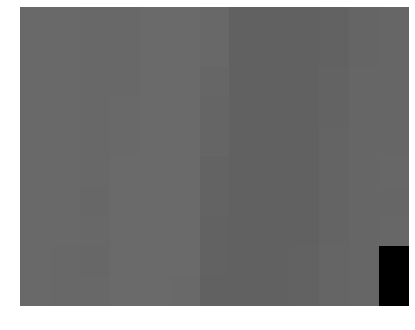

In [0]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('Image-Walk01.png')

plt.imshow(im)
plt.axis('off')
plt.show()


##### Looking at the above output you can see how each pixel represents a letter in the SAX walk activity string above.

##### Letters deeper in the alphabet (h, i, j) seem to indicate a lighter grey while earlier letters in the alphabet (a, b, c, d) show a darker grey.

## Now, what does the original data look like graphically?


# Walk Graph:

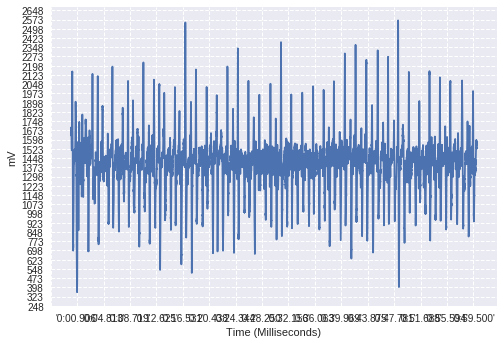

In [0]:
# Import matplotlib library
import matplotlib

# Import graphing tools and libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load in data from PPG datasets (../../resources/exercise-datasets)
# Contains 15000+ rows, 2 columns.
walk_set = pd.read_csv("Walk01.csv", skiprows=[1])
# run_set = pd.read_csv("Run01.csv", skiprows=[1])
# slow_cycle_set = pd.read_csv("LowResistanceBike01.csv", skiprows=[1])
# fast_cycle_set = pd.read_csv("HighResistanceBike01.csv", skiprows=[1])

x = walk_set['\'Elapsed time\'']

y1 = walk_set['\'wrist_ppg\'']
# y2 = run_set['\'wrist_ppg\'']
# y3 = slow_cycle_set['\'wrist_ppg\'']
# y4 = fast_cycle_set['\'wrist_ppg\'']

fig, ax = plt.subplots(ncols=1, nrows=1)

ax.plot(x, y1) # , x, y2, x, y3, x, y4)
ax.grid(linestyle='--')

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 75))

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 1000))

plt.ylabel('mV')
plt.xlabel('Time (Milliseconds)')

plt.show()


## The graph below shows the 128 pixel image above in graph format. 
### Graph in sax format: iiiiiiiiiiiiiiiiiihhhhhhhhghghhhhiijjjjjjjjjjjjjjjjjjjjjjjjihhfeeccbbaaaaaaaaaaaaaaaaaaaaaaaaaaaaabbbbccddddeeeefffffffffffffgfg


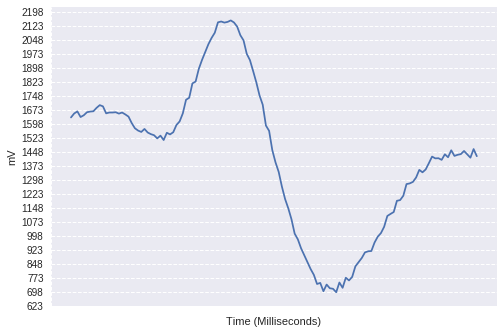

In [0]:
# Import matplotlib library
import matplotlib

# Import graphing tools and libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load in data from PPG datasets (../../resources/exercise-datasets)
# Contains 15000+ rows, 2 columns.
walk_set = pd.read_csv("Walk01.csv", skiprows=[1])
walk_set = walk_set.head(128)
# run_set = pd.read_csv("Run01.csv", skiprows=[1])
# slow_cycle_set = pd.read_csv("LowResistanceBike01.csv", skiprows=[1])
# fast_cycle_set = pd.read_csv("HighResistanceBike01.csv", skiprows=[1])

x = walk_set['\'Elapsed time\'']

y1 = walk_set['\'wrist_ppg\'']
# y2 = run_set['\'wrist_ppg\'']
# y3 = slow_cycle_set['\'wrist_ppg\'']
# y4 = fast_cycle_set['\'wrist_ppg\'']

fig, ax = plt.subplots(ncols=1, nrows=1)

ax.plot(x, y1) # , x, y2, x, y3, x, y4)
ax.grid(linestyle='--')

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 75))

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 1000))

plt.ylabel('mV')
plt.xlabel('Time (Milliseconds)')

plt.show()

---














## Run Image

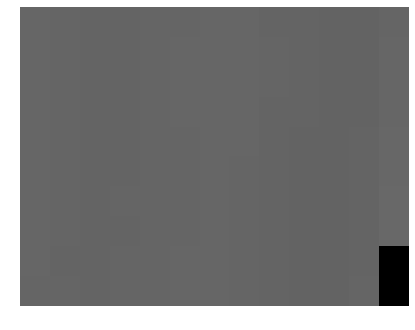

In [0]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('Image-Run01.png')

plt.imshow(im)
plt.axis('off')
plt.show()

## SAX String: fffffffffeeeeeeeeededdddddddddddddddedeeeeeeeeeeeeefffeeeefffffffffffffffffeeeeedeedddddddddddccccccccccccccccccccdddddeefffgghh

Snce the letters revolve around the start of the alphabet, the colour is generally darker.

a = Darkest
b = 2nd Darkest
etc... etc... etc...

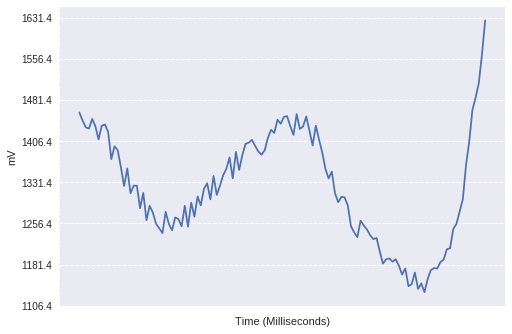

In [0]:
# Import matplotlib library
import matplotlib

# Import graphing tools and libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load in data from PPG datasets (../../resources/exercise-datasets)
# Contains 15000+ rows, 2 columns.
# walk_set = pd.read_csv("Walk01.csv", skiprows=[1])
run_set = pd.read_csv("Run01.csv", skiprows=[1])
run_set = run_set.head(128)
# slow_cycle_set = pd.read_csv("LowResistanceBike01.csv", skiprows=[1])
# fast_cycle_set = pd.read_csv("HighResistanceBike01.csv", skiprows=[1])

x = run_set['\'Elapsed time\'']

# y1 = walk_set['\'wrist_ppg\'']
y2 = run_set['\'wrist_ppg\'']
# y3 = slow_cycle_set['\'wrist_ppg\'']
# y4 = fast_cycle_set['\'wrist_ppg\'']

fig, ax = plt.subplots(ncols=1, nrows=1)

ax.plot(x, y2) # , x, y2, x, y3, x, y4)
ax.grid(linestyle='--')

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 75))

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 1000))

plt.ylabel('mV')
plt.xlabel('Time (Milliseconds)')

plt.show()

### All Datasets (Walk/Run/LowBike/HighBike) merged into a single graph

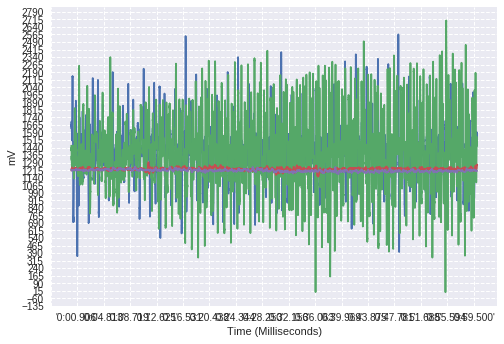

In [0]:
# Import matplotlib library
import matplotlib

# Import graphing tools and libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load in data from PPG datasets (../../resources/exercise-datasets)
# Contains 15000+ rows, 2 columns.
walk_set = pd.read_csv("Walk01.csv", skiprows=[1])
run_set = pd.read_csv("Run01.csv", skiprows=[1])
slow_cycle_set = pd.read_csv("LowResistanceBike01.csv", skiprows=[1])
fast_cycle_set = pd.read_csv("HighResistanceBike01.csv", skiprows=[1])

x = walk_set['\'Elapsed time\'']

y1 = walk_set['\'wrist_ppg\'']
y2 = run_set['\'wrist_ppg\'']
y3 = slow_cycle_set['\'wrist_ppg\'']
y4 = fast_cycle_set['\'wrist_ppg\'']

fig, ax = plt.subplots(ncols=1, nrows=1)

ax.plot(x, y1, x, y2, x, y3, x, y4)
ax.grid(linestyle='--')

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 75))

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 1000))

plt.ylabel('mV')
plt.xlabel('Time (Milliseconds)')

plt.show()


### 1. Walk = Blue Line
### 2. Run = Green Line
### 3. Low_Bike = Red Line
### 4. High_Bike = Purple Line